In [13]:
import tensorflow as tf
from tensorflow import keras
from osgeo import gdal
from keras.models import load_model
import os

epoch-0-prediction.png	 epoch-24-prediction.png  epoch-4-prediction.png
epoch-10-prediction.png  epoch-25-prediction.png  epoch-5-prediction.png
epoch-11-prediction.png  epoch-26-prediction.png  epoch-6-prediction.png
epoch-12-prediction.png  epoch-27-prediction.png  epoch-7-prediction.png
epoch-13-prediction.png  epoch-28-prediction.png  epoch-8-prediction.png
epoch-14-prediction.png  epoch-29-prediction.png  epoch-9-prediction.png
epoch-15-prediction.png  epoch-2-prediction.png   epoch--prediction.png
epoch-16-prediction.png  epoch-30-prediction.png  output_raster.tif
epoch-17-prediction.png  epoch-31-prediction.png  processing.ipynb
epoch-18-prediction.png  epoch-32-prediction.png  super.ipynb
epoch-19-prediction.png  epoch-33-prediction.png  super_tif.h5
epoch-1-prediction.png	 epoch-34-prediction.png  test-test.png
epoch-20-prediction.png  epoch-35-prediction.png  Test-Test.png
epoch-21-prediction.png  epoch-36-prediction.png  Untitled.ipynb
epoch-22-prediction.png  epoch-37-predi

In [4]:
model = load_model("super_tif.h5")

2023-03-09 22:42:00.902035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-09 22:42:00.902245: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-09 22:42:00.902293: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-09 22:42:00.902332: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-09 22:42:00.902365: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [11]:
files = ["v/" + file for file in os.listdir("v")]

In [16]:
def tensor_create(file_name):
    return gdal.Open(file_name).ReadAsArray()

def scaling(input_tensor):
    max_val = tf.reduce_max(input_tensor)
    input_tensor = input_tensor / max_val;
    return input_tensor

In [118]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np


def plot_results(img, original, squeeze=True):
    """Plot the result with zoom-in area."""
    if squeeze:
        img_array = np.squeeze(img, axis=(0, 3))
    else:
        img_array = img
    print(img_array.shape)

    large_size = img_array.shape[1]
    inc1 = large_size // 12
    inc2 = inc1 / 2
    num1, num2, num3, num4 = (7.2, 8.6, 1.8, 3.2)

    # Init figure settings
    fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 9), subplot_kw={'aspect':'equal'})
    fig.set_dpi(300)
    
    # Predictive figure
    im = ax.imshow(img_array, origin="lower")

    # zoom-factor: 2.0, location: upper-left
    axins = zoomed_inset_axes(ax, 5, loc=2)
    axins.imshow(img_array, origin="lower")
    ax.set_title("Interpolated")

    xo1, xo2, yo1, yo2 = inc1*num1, inc1*num2, inc1*num3, inc1*num4
    axins.set_xlim(xo1, xo2)
    axins.set_ylim(yo1, yo2)

    # --------------------------------------
    
    im2 = ax2.imshow(original, origin="lower")
    

    # zoom-factor: 2.0, location: upper-left
    axins2 = zoomed_inset_axes(ax2, 5, loc=2)
    axins2.imshow(original, origin="lower")
    ax2.set_title("Original")
    
    xf1, xf2, yf1, yf2 = inc2*num1, inc2*num2, inc2*num3, inc2*num4
    axins2.set_xlim(xf1, xf2)
    axins2.set_ylim(yf1, yf2)
    
    # -------------------------------------
    
    amin = np.amin(original)
    amax = np.amax(original)
    
    im.set_clim(amin, amax)
    im2.set_clim(amin, amax)
    
    mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="blue")
    mark_inset(ax2, axins2, loc1=1, loc2=3, fc="none", ec="blue")
        
    plt.yticks(visible=False)
    plt.xticks(visible=False)

    # Make the line.

    plt.savefig("interpolation" + ".png")
    plt.show()


def upscale_image(model, img):
    inputt = np.expand_dims(img, axis=0)
    out = model.predict(inputt)

    return out

1/1 [==============================] - 0s 94ms/step
(1024, 1024)


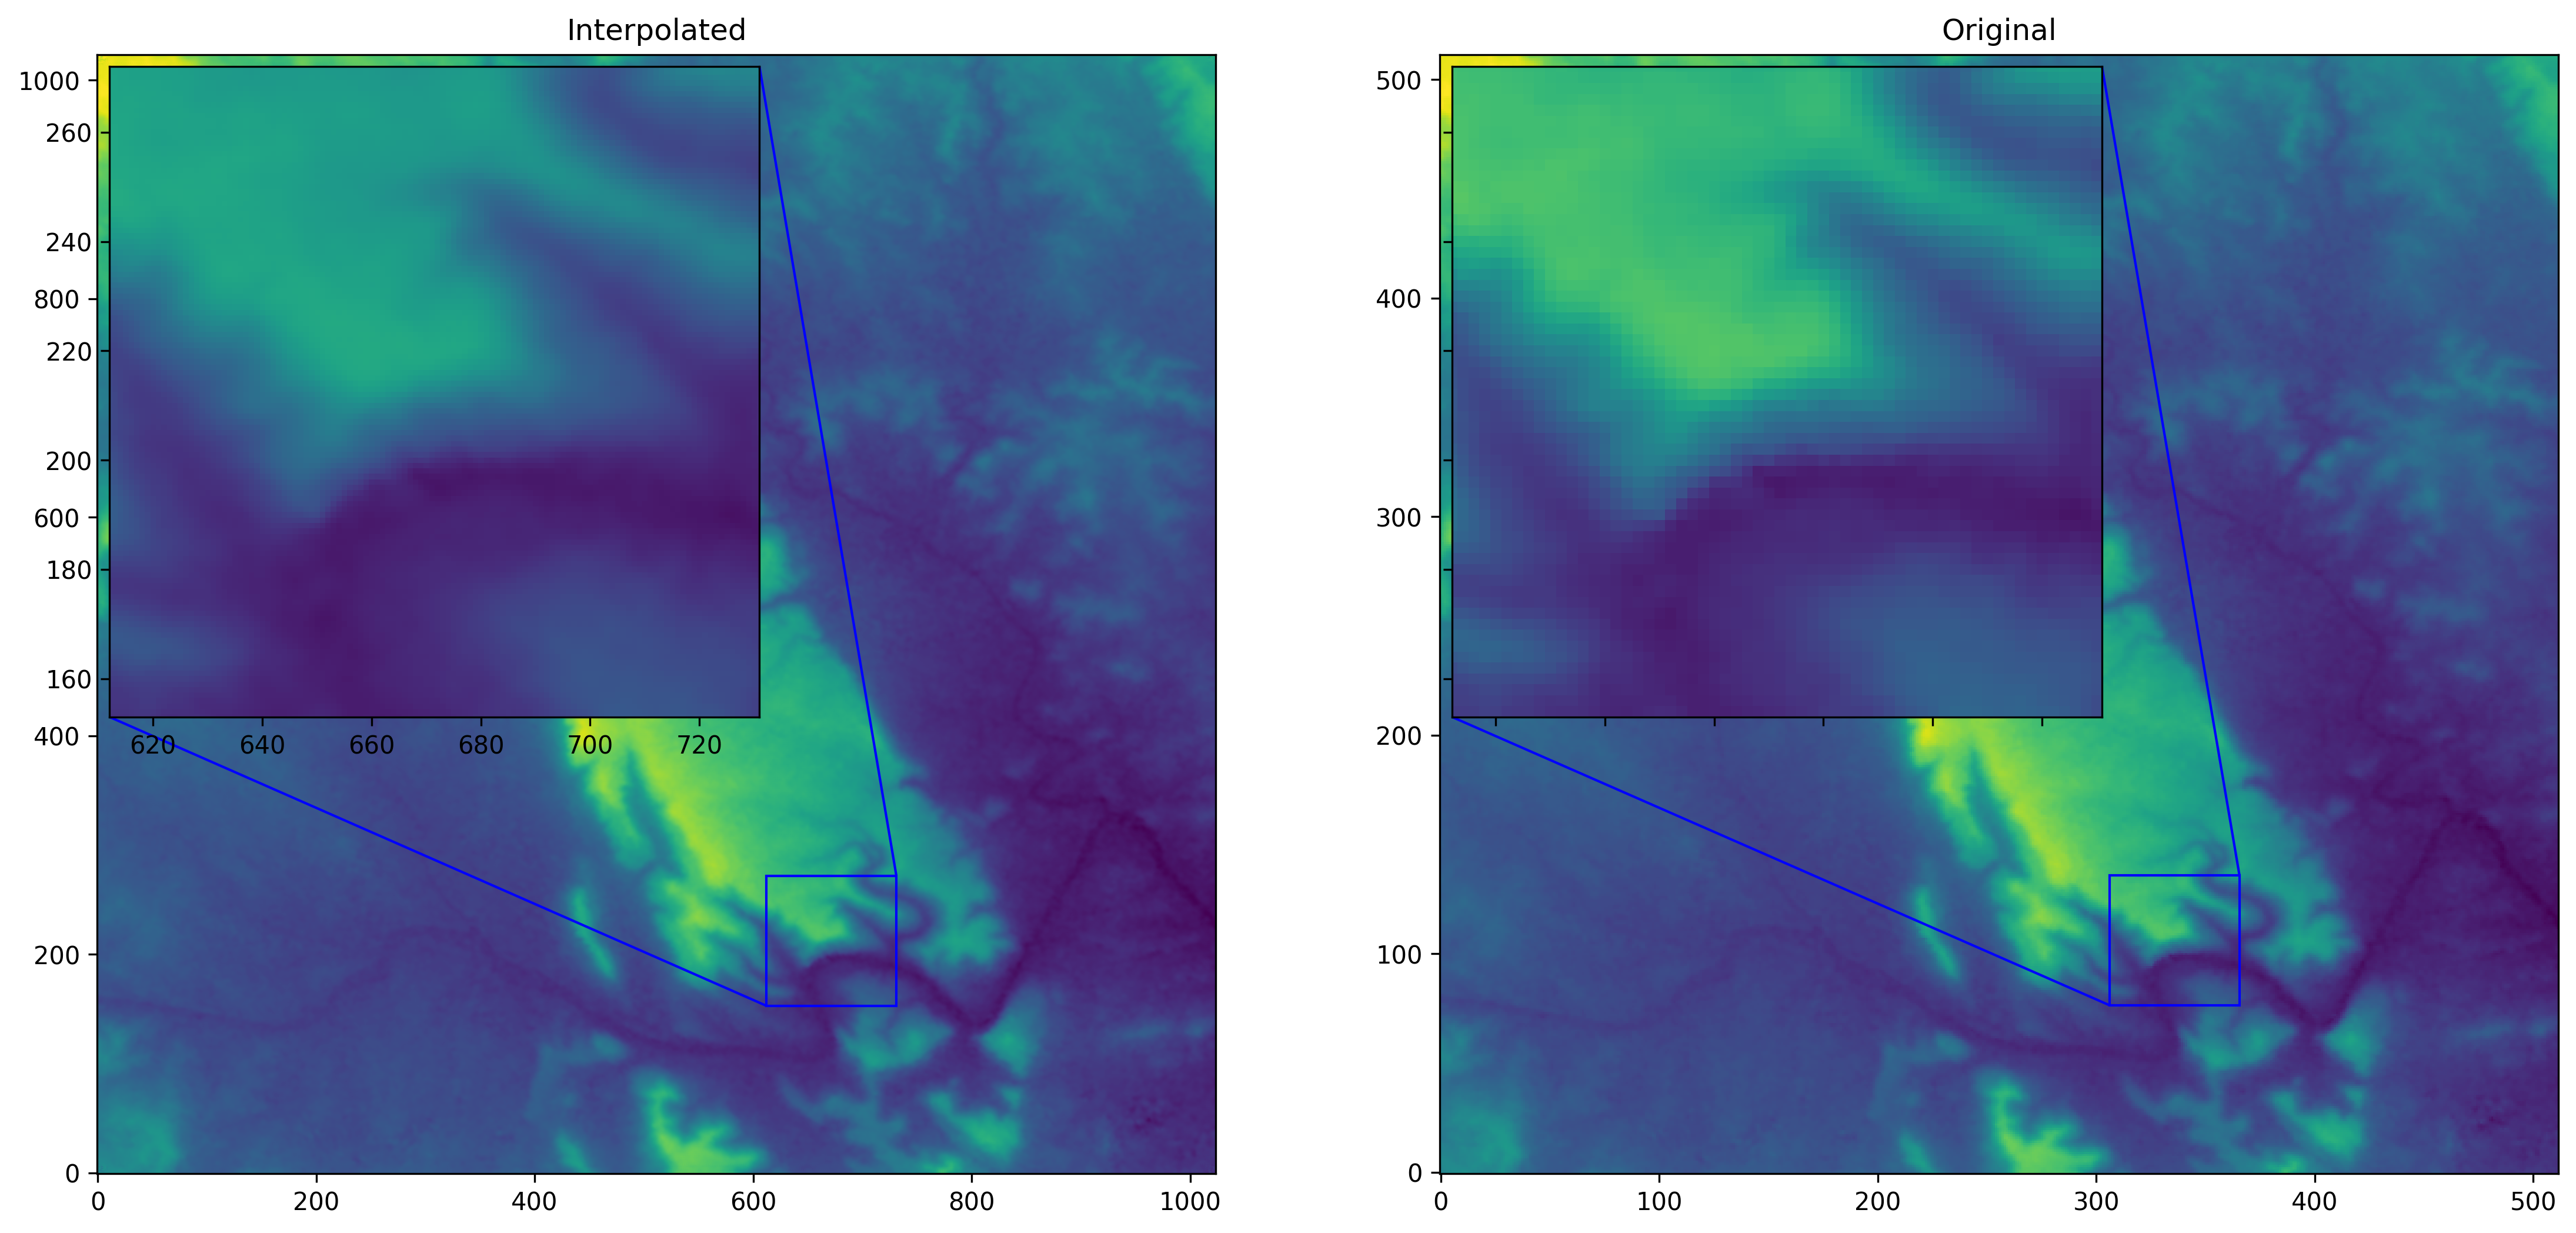

In [119]:
index = 4
test_img = scaling(tensor_create(files[index]))
prediction = upscale_image(model, test_img)
plot_results(prediction, test_img)